# Task 1: Data Exploration and Enrichment

This notebook explores the Ethiopia Financial Inclusion dataset and documents the enrichment process.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import sys

# Add src to path
sys.path.insert(0, str(Path().resolve().parent / 'src'))

from data_loader import load_unified_data, load_reference_codes

# Set plotting style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

## 1. Load Data

In [4]:
# Load original data
main_data, impact_links = load_unified_data()
ref_codes = load_reference_codes()

print(f"Main data shape: {main_data.shape}")
print(f"Impact links shape: {impact_links.shape}")
print(f"Reference codes shape: {ref_codes.shape}")

Main data shape: (43, 34)
Impact links shape: (14, 35)
Reference codes shape: (71, 4)


## 2. Explore Record Types

Record Type Distribution:
record_type
observation    30
event          10
target          3
Name: count, dtype: int64


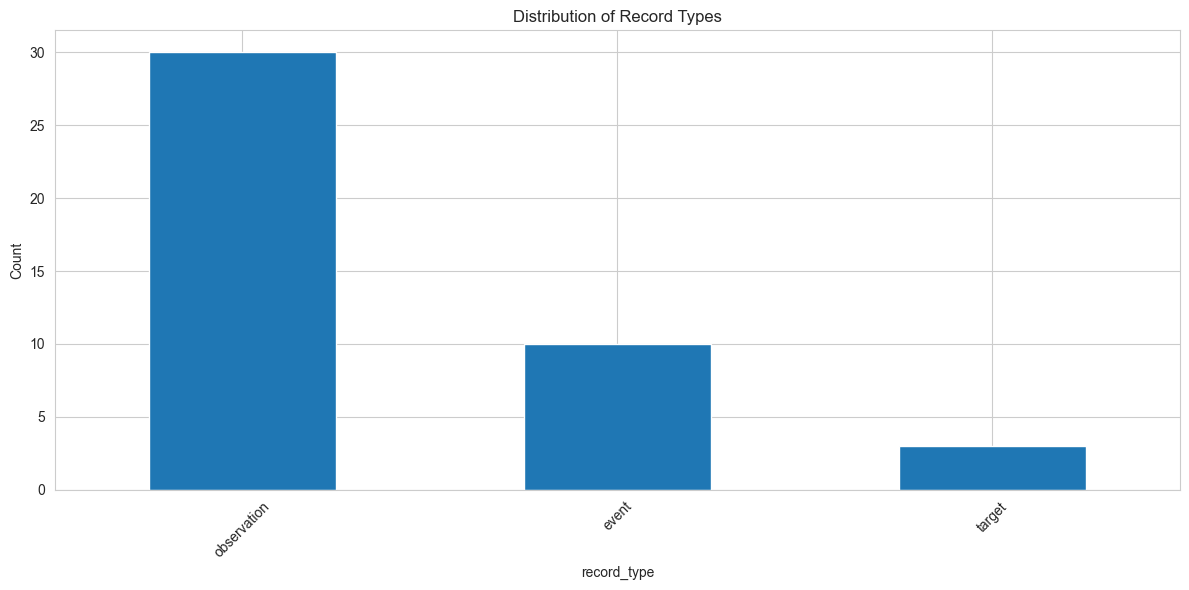

In [5]:
# Record type distribution
print("Record Type Distribution:")
print(main_data['record_type'].value_counts())

main_data['record_type'].value_counts().plot(kind='bar')
plt.title('Distribution of Record Types')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 3. Explore Observations by Pillar

Observations by Pillar:
pillar
ACCESS           14
USAGE            11
GENDER            4
AFFORDABILITY     1
Name: count, dtype: int64


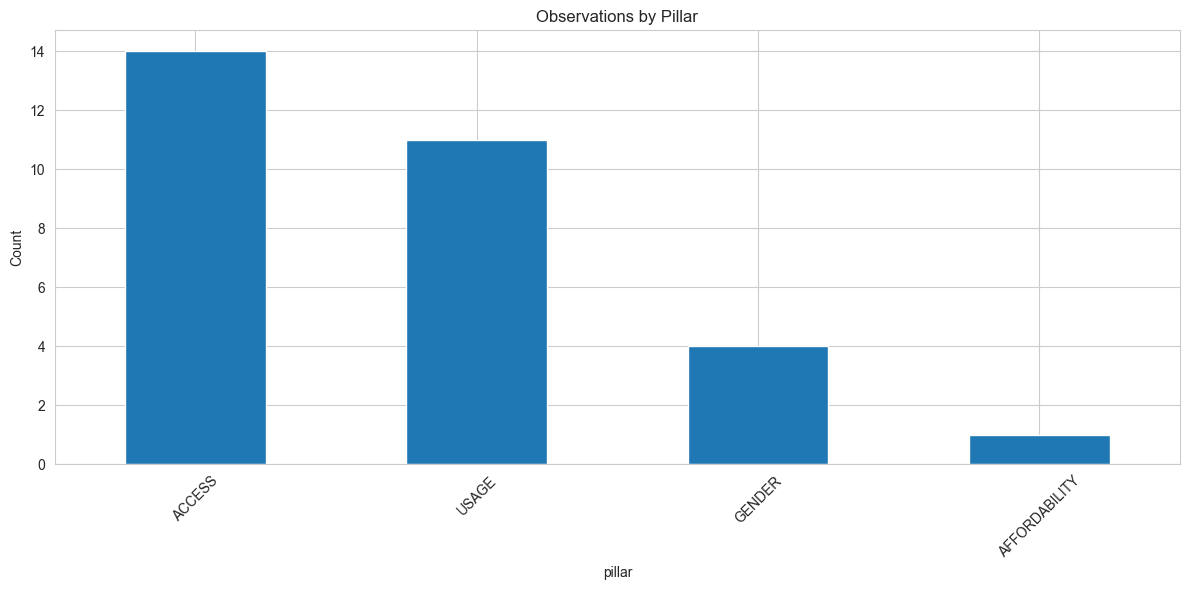

In [6]:
# Observations by pillar
observations = main_data[main_data['record_type'] == 'observation']

print("Observations by Pillar:")
print(observations['pillar'].value_counts())

observations['pillar'].value_counts().plot(kind='bar')
plt.title('Observations by Pillar')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 4. Temporal Analysis - Account Ownership Over Time

C:\Users\nesre\AppData\Local\Temp\ipykernel_3528\3575044824.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  observations['date'] = pd.to_datetime(observations['observation_date'], errors='coerce')
C:\Users\nesre\AppData\Local\Temp\ipykernel_3528\3575044824.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  observations['year'] = observations['date'].dt.year


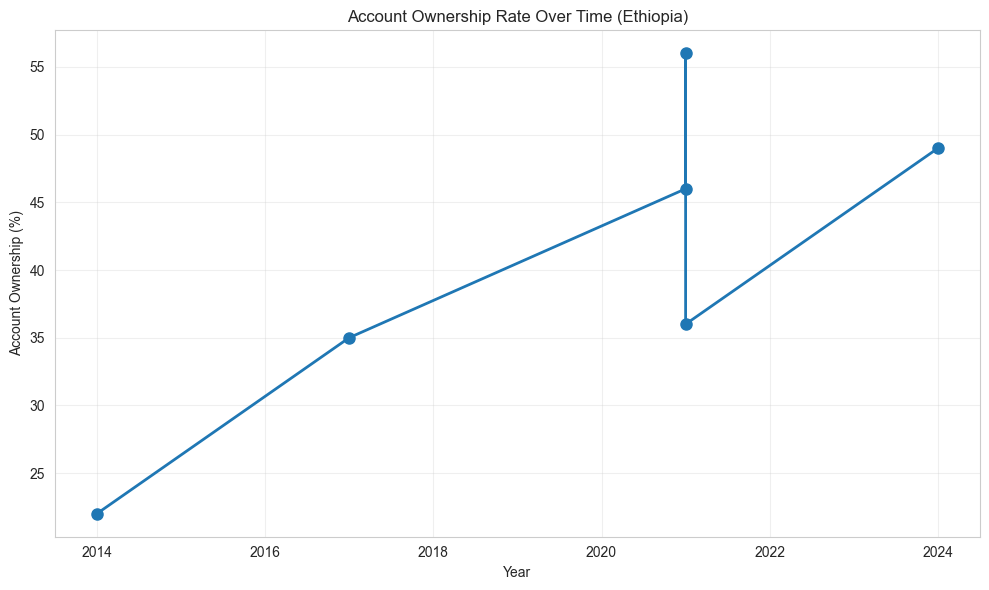


Account Ownership Timeline:
 year  value_numeric
 2014           22.0
 2017           35.0
 2021           46.0
 2021           56.0
 2021           36.0
 2024           49.0


In [7]:
# Convert dates
observations['date'] = pd.to_datetime(observations['observation_date'], errors='coerce')
observations['year'] = observations['date'].dt.year

# Account ownership over time
acc_ownership = observations[
    (observations['indicator_code'] == 'ACC_OWNERSHIP') & 
    (observations['value_numeric'].notna())
].sort_values('year')

plt.figure(figsize=(10, 6))
plt.plot(acc_ownership['year'], acc_ownership['value_numeric'], marker='o', linewidth=2, markersize=8)
plt.title('Account Ownership Rate Over Time (Ethiopia)')
plt.xlabel('Year')
plt.ylabel('Account Ownership (%)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nAccount Ownership Timeline:")
print(acc_ownership[['year', 'value_numeric']].to_string(index=False))

## 5. Events Analysis

Events by Category:
category
product_launch    2
infrastructure    2
policy            2
market_entry      1
milestone         1
partnership       1
pricing           1
Name: count, dtype: int64


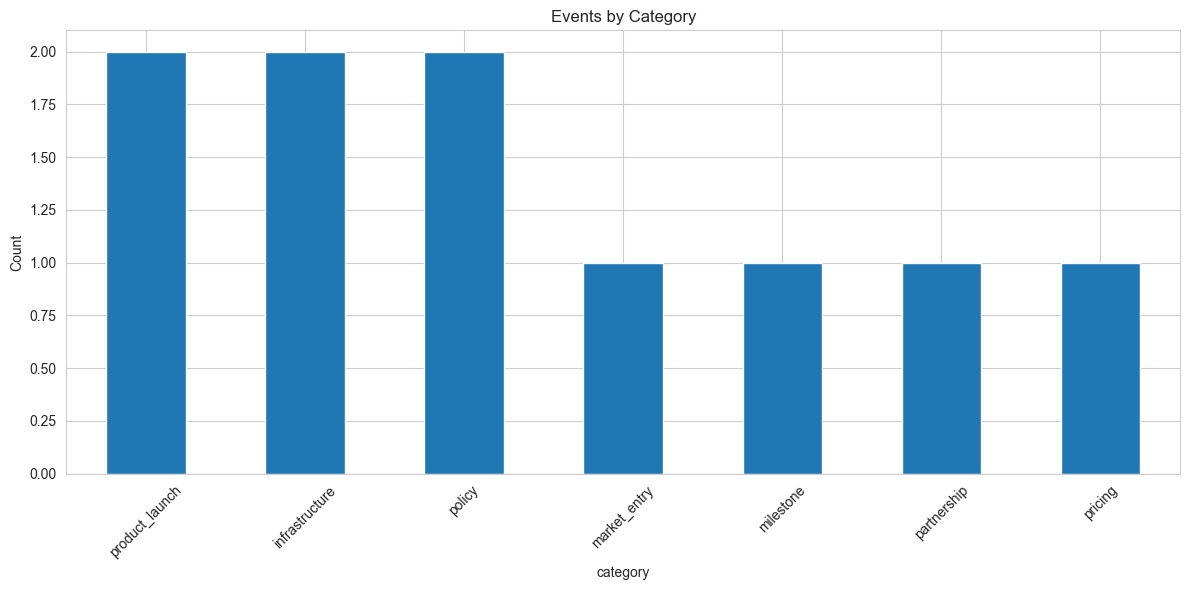


Event Timeline:
                             indicator       category event_date
                       Telebirr Launch product_launch 2021-05-17
               NFIS-II Strategy Launch         policy 2021-09-01
  Safaricom Ethiopia Commercial Launch   market_entry 2022-08-01
                M-Pesa Ethiopia Launch product_launch 2023-08-01
      Fayda Digital ID Program Rollout infrastructure 2024-01-01
       Foreign Exchange Liberalization         policy 2024-07-29
   P2P Transaction Count Surpasses ATM      milestone 2024-10-01
          M-Pesa EthSwitch Integration    partnership 2025-10-27
     Safaricom Ethiopia Price Increase        pricing 2025-12-15
EthioPay Instant Payment System Launch infrastructure 2025-12-18


C:\Users\nesre\AppData\Local\Temp\ipykernel_3528\1309231687.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events['event_date'] = pd.to_datetime(events['observation_date'], errors='coerce')


In [8]:
# Events by category
events = main_data[main_data['record_type'] == 'event']

print("Events by Category:")
print(events['category'].value_counts())

events['category'].value_counts().plot(kind='bar')
plt.title('Events by Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\nEvent Timeline:")
events['event_date'] = pd.to_datetime(events['observation_date'], errors='coerce')
events_sorted = events.sort_values('event_date')
print(events_sorted[['indicator', 'category', 'event_date']].to_string(index=False))

## 6. Impact Links Analysis

Impact Links by Pillar:
pillar
USAGE            6
ACCESS           4
AFFORDABILITY    3
GENDER           1
Name: count, dtype: int64

Impact Direction:
impact_direction
increase    12
decrease     2
Name: count, dtype: int64


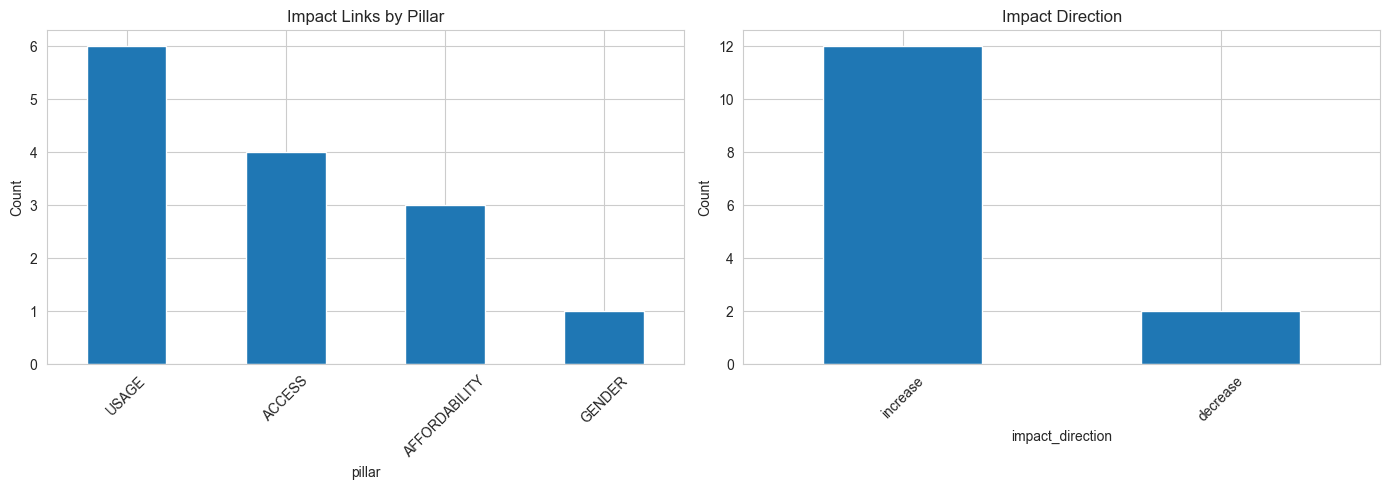

In [9]:
# Impact links by pillar
print("Impact Links by Pillar:")
print(impact_links['pillar'].value_counts())

print("\nImpact Direction:")
print(impact_links['impact_direction'].value_counts())

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

impact_links['pillar'].value_counts().plot(kind='bar', ax=axes[0])
axes[0].set_title('Impact Links by Pillar')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

impact_links['impact_direction'].value_counts().plot(kind='bar', ax=axes[1])
axes[1].set_title('Impact Direction')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 7. Data Quality Analysis

Top 10 Columns with Missing Values:
                   Missing Count   Missing %
evidence_basis                43  100.000000
region                        43  100.000000
relationship_type             43  100.000000
related_indicator             43  100.000000
notes                         43  100.000000
impact_estimate               43  100.000000
impact_magnitude              43  100.000000
impact_direction              43  100.000000
lag_months                    43  100.000000
value_text                    33   76.744186


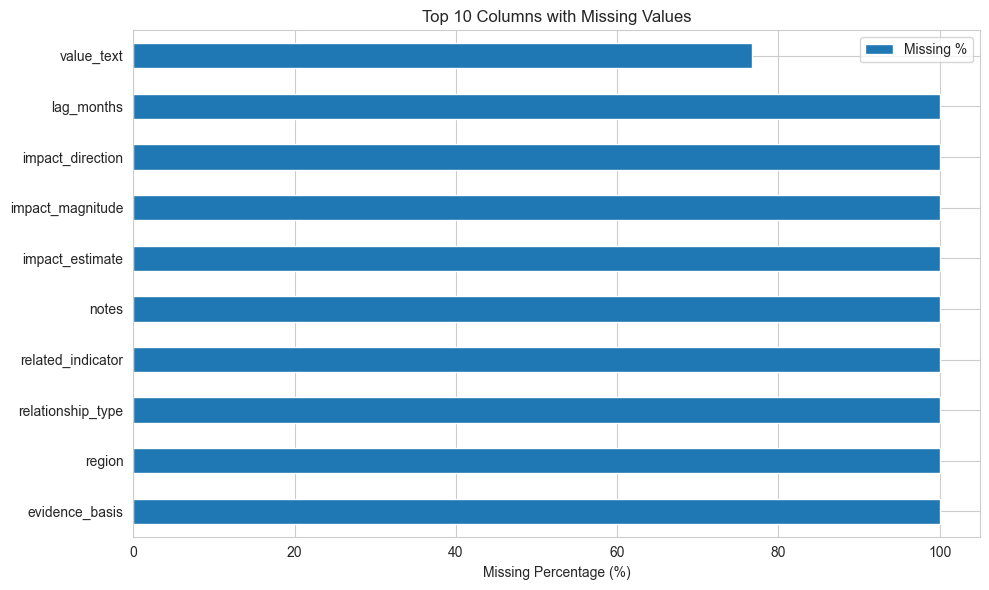

In [10]:
# Missing values analysis
missing = main_data.isnull().sum()
missing_pct = (missing / len(main_data)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Missing %': missing_pct
})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

print("Top 10 Columns with Missing Values:")
print(missing_df.head(10).to_string())

# Visualize
missing_df.head(10).plot(kind='barh', y='Missing %', figsize=(10, 6))
plt.title('Top 10 Columns with Missing Values')
plt.xlabel('Missing Percentage (%)')
plt.tight_layout()
plt.show()

## 8. Load and Compare Enriched Data

In [11]:
# Load enriched data
enriched_file = Path().resolve().parent / 'data' / 'processed' / 'ethiopia_fi_unified_data_enriched.xlsx'

if enriched_file.exists():
    enriched_main = pd.read_excel(enriched_file, sheet_name=0)
    enriched_links = pd.read_excel(enriched_file, sheet_name=1)
    
    print(f"Original main data: {len(main_data)} records")
    print(f"Enriched main data: {len(enriched_main)} records")
    print(f"Added: {len(enriched_main) - len(main_data)} new records\n")
    
    print(f"Original impact links: {len(impact_links)} records")
    print(f"Enriched impact links: {len(enriched_links)} records")
    print(f"Added: {len(enriched_links) - len(impact_links)} new impact links\n")
    
    # Show new observations
    new_obs = enriched_main[enriched_main['record_id'].str.startswith('REC_004', na=False)]
    print("New Observations Added:")
    print(new_obs[['record_id', 'indicator', 'pillar', 'value_numeric', 'observation_date']].to_string(index=False))
    
    # Show new events
    new_events = enriched_main[enriched_main['record_id'].str.startswith('EVT_001', na=False)]
    print("\n\nNew Events Added:")
    print(new_events[['record_id', 'indicator', 'category', 'observation_date']].to_string(index=False))
    
    # Show new impact links
    new_links = enriched_links[enriched_links['record_id'].str.startswith('IMP_001', na=False)]
    print("\n\nNew Impact Links Added:")
    print(new_links[['record_id', 'parent_id', 'pillar', 'related_indicator', 'impact_direction']].to_string(index=False))
else:
    print("Enriched data file not found. Run src/enrich_data.py first.")

Original main data: 43 records
Enriched main data: 51 records
Added: 8 new records

Original impact links: 14 records
Enriched impact links: 17 records
Added: 3 new impact links

New Observations Added:
Empty DataFrame
Columns: [record_id, indicator, pillar, value_numeric, observation_date]
Index: []


New Events Added:
record_id                               indicator       category observation_date
 EVT_0010       Safaricom Ethiopia Price Increase        pricing       2025-12-15
 EVT_0011 Interoperability Mandate Implementation     regulation       2023-06-01
 EVT_0011         QR Code Payment Standard Launch infrastructure       2024-03-01
 EVT_0011         Agent Network Expansion Program infrastructure       2023-01-01


New Impact Links Added:
record_id parent_id        pillar related_indicator impact_direction
 IMP_0010  EVT_0005 AFFORDABILITY   AFF_DATA_INCOME         increase
 IMP_0011  EVT_0007         USAGE  USG_MPESA_ACTIVE         increase
 IMP_0012  EVT_0007         USAGE  

## 9. Summary Statistics

In [12]:
# Summary statistics for numeric observations
numeric_obs = observations[observations['value_numeric'].notna()].copy()

print("Summary Statistics by Pillar:")
for pillar in numeric_obs['pillar'].unique():
    pillar_data = numeric_obs[numeric_obs['pillar'] == pillar]
    print(f"\n{pillar}:")
    print(f"  Count: {len(pillar_data)}")
    print(f"  Mean: {pillar_data['value_numeric'].mean():.2f}")
    print(f"  Min: {pillar_data['value_numeric'].min():.2f}")
    print(f"  Max: {pillar_data['value_numeric'].max():.2f}")

# Temporal coverage
print("\n\nTemporal Coverage:")
print(f"Earliest observation: {observations['date'].min()}")
print(f"Latest observation: {observations['date'].max()}")
print(f"Date range: {(observations['date'].max() - observations['date'].min()).days} days")

Summary Statistics by Pillar:

ACCESS:
  Count: 14
  Mean: 2500030.56
  Min: 4.70
  Max: 15000000.00

USAGE:
  Count: 11
  Mean: 283106367278.83
  Min: 1.08
  Max: 2380000000000.00

AFFORDABILITY:
  Count: 1
  Mean: 2.00
  Min: 2.00
  Max: 2.00

GENDER:
  Count: 4
  Mean: 19.00
  Min: 14.00
  Max: 24.00


Temporal Coverage:
Earliest observation: 2014-12-31 00:00:00
Latest observation: 2025-12-31 00:00:00
Date range: 4018 days
